# EDA on the Earthquake Dataset using D3.js

In [1]:
# Cell 2: Import Necessary Libraries
import pandas as pd
from IPython.display import display, HTML

In [3]:
!kaggle datasets download usgs/earthquake-database

Dataset URL: https://www.kaggle.com/datasets/usgs/earthquake-database
License(s): CC0-1.0
100% 590k/590k [00:00<00:00, 736kB/s]
100% 590k/590k [00:00<00:00, 736kB/s]


In [4]:
!unzip earthquake-database.zip

Archive:  earthquake-database.zip
  inflating: database.csv            


In [2]:
# Cell 3: Load the Earthquake Dataset
# Make sure you've downloaded the dataset using the Kaggle CLI or uploaded it to your environment.
# Adjust the file path as necessary.
data_path = 'database.csv'  # Replace with the correct path if different
df = pd.read_csv(data_path)

# Display the first few rows to understand the structure of the data
df.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# Cell 5: Drop Unnecessary Columns
# Remove columns that are entirely NaN or not relevant for visualization
columns_to_drop = ['Depth Error', 'Depth Seismic Stations', 'Magnitude Seismic Stations',
                   'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square',
                   'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']
df_cleaned = df.drop(columns=columns_to_drop)

# Display the cleaned dataset structure
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             23412 non-null  object 
 1   Time             23412 non-null  object 
 2   Latitude         23412 non-null  float64
 3   Longitude        23412 non-null  float64
 4   Type             23412 non-null  object 
 5   Depth            23412 non-null  float64
 6   Magnitude        23412 non-null  float64
 7   Magnitude Type   23409 non-null  object 
 8   Magnitude Error  327 non-null    float64
dtypes: float64(5), object(4)
memory usage: 1.6+ MB


In [4]:
# Cell 6: Convert Dates and Times
# Convert 'Date' and 'Time' columns into a single datetime column for analysis
df_cleaned['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Drop the original 'Date' and 'Time' columns
df_cleaned = df_cleaned.drop(columns=['Date', 'Time'])

# Check the first few rows to confirm changes
df_cleaned.head()


,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Magnitude Error,Datetime
0,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,1965-01-02 13:44:18
1,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,1965-01-04 11:29:49
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,1965-01-05 18:05:58
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,1965-01-08 18:49:43
4,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,1965-01-09 13:32:50


In [5]:
# Cell 7: Basic Statistical Summary
# Get a statistical overview of numeric columns
df_cleaned.describe()

# Count the number of unique earthquake types
df_cleaned['Type'].value_counts()


,count
Type,
Earthquake,23232
Nuclear Explosion,175
Explosion,4
Rock Burst,1


In [6]:
# Cell 8: Handling Missing Values
# Drop rows with NaN in critical columns (e.g., Magnitude or Datetime)
df_cleaned = df_cleaned.dropna(subset=['Magnitude', 'Datetime'])

# Reset the index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Check the cleaned dataset
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Latitude         23409 non-null  float64       
 1   Longitude        23409 non-null  float64       
 2   Type             23409 non-null  object        
 3   Depth            23409 non-null  float64       
 4   Magnitude        23409 non-null  float64       
 5   Magnitude Type   23406 non-null  object        
 6   Magnitude Error  327 non-null    float64       
 7   Datetime         23409 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.4+ MB


In [7]:
# Cell 9: Create a Sample Dataset for D3.js Visualizations
# We'll create a subset of data focusing on earthquakes only
earthquake_data = df_cleaned[df_cleaned['Type'] == 'Earthquake']

# Focus on important columns for visualization
# We'll use Latitude, Longitude, Magnitude, and Depth
visualization_data = earthquake_data[['Latitude', 'Longitude', 'Magnitude', 'Depth', 'Datetime']].sample(1000)

# Save this sample data to a CSV for use in D3.js
visualization_data.to_csv('visualization_data.csv', index=False)


In [8]:
# Cell 10: Display Data for Verification
# Show the first few rows of the dataset prepared for D3.js
visualization_data.head()


,Latitude,Longitude,Magnitude,Depth,Datetime
7285,-14.505,171.162,6.4,23.4,1984-11-21 14:33:20
6281,-23.859,-66.605,5.5,182.5,1982-09-03 20:14:30
6096,23.900,121.707,5.9,17.0,1982-01-23 14:10:40
2398,-21.396,-174.371,5.6,40.0,1972-08-10 15:31:27
19212,14.256,-92.554,5.8,23.2,2008-10-16 19:43:37


In [10]:
# Cell 11: Embed D3.js in Jupyter Notebook
from IPython.core.display import HTML

# Cell 12: Write the D3.js Visualization to an HTML File
d3_html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Earthquake Visualization</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .axis text {
            font: 10px sans-serif;
        }
        .axis path,
        .axis line {
            fill: none;
            shape-rendering: crispEdges;
        }
        .dot {
            stroke: #000;
        }
    </style>
</head>
<body>
<script>
// Set dimensions and margins
const margin = {top: 20, right: 30, bottom: 40, left: 40};
const width = 800 - margin.left - margin.right;
const height = 400 - margin.top - margin.bottom;

// Append SVG element
const svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", `translate(${margin.left},${margin.top})`);

// Load data
d3.csv("visualization_data.csv").then(data => {
    // Parse data
    data.forEach(d => {
        d.Magnitude = +d.Magnitude;
        d.Depth = +d.Depth;
    });

    // Create scales
    const x = d3.scaleLinear().domain(d3.extent(data, d => d.Magnitude)).range([0, width]);
    const y = d3.scaleLinear().domain(d3.extent(data, d => d.Depth)).range([height, 0]);

    // Add axes
    svg.append("g").call(d3.axisBottom(x)).attr("transform", `translate(0,${height})`);
    svg.append("g").call(d3.axisLeft(y));

    // Add points
    svg.selectAll(".dot")
        .data(data)
        .enter()
        .append("circle")
        .attr("class", "dot")
        .attr("cx", d => x(d.Magnitude))
        .attr("cy", d => y(d.Depth))
        .attr("r", 3)
        .style("fill", "steelblue");
});
</script>
</body>
</html>
"""

# Write to an HTML file
with open("earthquake_visualization.html", "w") as f:
    f.write(d3_html_content)

print("HTML file created: earthquake_visualization.html")


HTML file created: earthquake_visualization.html


In [11]:
# Cell 13: Instructions to View the File
print("To view the visualization, follow these steps:")
print("1. Download the 'earthquake_visualization.html' file and the 'visualization_data.csv' file.")
print("2. Place them in the same folder.")
print("3. Open the 'earthquake_visualization.html' file in a web browser.")


To view the visualization, follow these steps:
1. Download the 'earthquake_visualization.html' file and the 'visualization_data.csv' file.
2. Place them in the same folder.
3. Open the 'earthquake_visualization.html' file in a web browser.


In [14]:
# Cell 14: Update the HTML with Interactivity
# This code adds tooltips to display earthquake details when hovering over points
d3_html_with_tooltips = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Earthquake Visualization with Tooltips</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .axis text {
            font: 10px sans-serif;
        }
        .axis path,
        .axis line {
            fill: none;
            shape-rendering: crispEdges;
        }
        .dot {
            stroke: #000;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid #ccc;
            padding: 5px;
            font-size: 12px;
            pointer-events: none;
        }
    </style>
</head>
<body>
<div id="tooltip" class="tooltip" style="opacity: 0;"></div>
<script>
// Set dimensions and margins
const margin = {top: 20, right: 30, bottom: 40, left: 40};
const width = 800 - margin.left - margin.right;
const height = 400 - margin.top - margin.bottom;

// Append SVG element
const svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", `translate(${margin.left},${margin.top})`);

// Tooltip
const tooltip = d3.select("#tooltip");

// Load data
d3.csv("visualization_data.csv").then(data => {
    // Parse data
    data.forEach(d => {
        d.Magnitude = +d.Magnitude;
        d.Depth = +d.Depth;
        d.Latitude = +d.Latitude;
        d.Longitude = +d.Longitude;
    });

    // Create scales
    const x = d3.scaleLinear().domain(d3.extent(data, d => d.Magnitude)).range([0, width]);
    const y = d3.scaleLinear().domain(d3.extent(data, d => d.Depth)).range([height, 0]);

    // Add axes
    svg.append("g").call(d3.axisBottom(x)).attr("transform", `translate(0,${height})`);
    svg.append("g").call(d3.axisLeft(y));

    // Add points with tooltips
    svg.selectAll(".dot")
        .data(data)
        .enter()
        .append("circle")
        .attr("class", "dot")
        .attr("cx", d => x(d.Magnitude))
        .attr("cy", d => y(d.Depth))
        .attr("r", 4)
        .style("fill", "steelblue")
        .on("mouseover", (event, d) => {
            tooltip.transition().duration(200).style("opacity", 1);
            tooltip.html(`Magnitude: ${d.Magnitude}<br>Depth: ${d.Depth}<br>Location: (${d.Latitude}, ${d.Longitude})`)
                .style("left", (event.pageX + 5) + "px")
                .style("top", (event.pageY - 28) + "px");
        })
        .on("mouseout", () => {
            tooltip.transition().duration(500).style("opacity", 0);
        });
});
</script>
</body>
</html>
"""

# Write to a new HTML file
with open("earthquake_visualization_with_tooltips.html", "w") as f:
    f.write(d3_html_with_tooltips)

print("HTML file created: earthquake_visualization_with_tooltips.html")


HTML file created: earthquake_visualization_with_tooltips.html


In [13]:
# Cell 15: Instructions to View the Enhanced Visualization
print("To view the enhanced visualization with tooltips:")
print("1. Download 'earthquake_visualization_with_tooltips.html' and 'visualization_data.csv'.")
print("2. Place them in the same folder.")
print("3. Start a local HTTP server (e.g., 'python -m http.server').")
print("4. Open 'earthquake_visualization_with_tooltips.html' in your browser.")


To view the enhanced visualization with tooltips:
1. Download 'earthquake_visualization_with_tooltips.html' and 'visualization_data.csv'.
2. Place them in the same folder.
3. Start a local HTTP server (e.g., 'python -m http.server').
4. Open 'earthquake_visualization_with_tooltips.html' in your browser.


In [15]:
# Cell 16: Add Color Coding and Interactive Legends
d3_html_with_legends = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Earthquake Visualization with Legends</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .axis text {
            font: 10px sans-serif;
        }
        .axis path,
        .axis line {
            fill: none;
            shape-rendering: crispEdges;
        }
        .dot {
            stroke: #000;
        }
        .legend {
            font-size: 12px;
            cursor: pointer;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid #ccc;
            padding: 5px;
            font-size: 12px;
            pointer-events: none;
        }
    </style>
</head>
<body>
<div id="tooltip" class="tooltip" style="opacity: 0;"></div>
<script>
// Set dimensions and margins
const margin = {top: 20, right: 100, bottom: 40, left: 40};
const width = 800 - margin.left - margin.right;
const height = 400 - margin.top - margin.bottom;

// Append SVG element
const svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", `translate(${margin.left},${margin.top})`);

// Tooltip
const tooltip = d3.select("#tooltip");

// Color scale for magnitude
const colorScale = d3.scaleThreshold()
    .domain([4, 5, 6, 7])
    .range(["#d4e157", "#ffeb3b", "#ff9800", "#e53935", "#b71c1c"]); // Green to red

// Load data
d3.csv("visualization_data.csv").then(data => {
    // Parse data
    data.forEach(d => {
        d.Magnitude = +d.Magnitude;
        d.Depth = +d.Depth;
        d.Latitude = +d.Latitude;
        d.Longitude = +d.Longitude;
    });

    // Create scales
    const x = d3.scaleLinear().domain(d3.extent(data, d => d.Magnitude)).range([0, width]);
    const y = d3.scaleLinear().domain(d3.extent(data, d => d.Depth)).range([height, 0]);

    // Add axes
    svg.append("g").call(d3.axisBottom(x)).attr("transform", `translate(0,${height})`);
    svg.append("g").call(d3.axisLeft(y));

    // Add points with color coding
    const dots = svg.selectAll(".dot")
        .data(data)
        .enter()
        .append("circle")
        .attr("class", "dot")
        .attr("cx", d => x(d.Magnitude))
        .attr("cy", d => y(d.Depth))
        .attr("r", 4)
        .style("fill", d => colorScale(d.Magnitude))
        .on("mouseover", (event, d) => {
            tooltip.transition().duration(200).style("opacity", 1);
            tooltip.html(`Magnitude: ${d.Magnitude}<br>Depth: ${d.Depth}<br>Location: (${d.Latitude}, ${d.Longitude})`)
                .style("left", (event.pageX + 5) + "px")
                .style("top", (event.pageY - 28) + "px");
        })
        .on("mouseout", () => {
            tooltip.transition().duration(500).style("opacity", 0);
        });

    // Add legend
    const legend = svg.append("g")
        .attr("transform", `translate(${width + 10}, 0)`);

    const magnitudeRanges = ["<4", "4-5", "5-6", "6-7", ">7"];
    magnitudeRanges.forEach((range, i) => {
        legend.append("circle")
            .attr("cx", 10)
            .attr("cy", i * 20)
            .attr("r", 6)
            .style("fill", colorScale(i + 4))
            .on("click", () => {
                // Filter points by magnitude range on click
                const filteredData = data.filter(d => {
                    if (range === "<4") return d.Magnitude < 4;
                    if (range === ">7") return d.Magnitude >= 7;
                    const [low, high] = range.split("-").map(Number);
                    return d.Magnitude >= low && d.Magnitude < high;
                });

                dots.data(filteredData)
                    .transition()
                    .duration(500)
                    .attr("cx", d => x(d.Magnitude))
                    .attr("cy", d => y(d.Depth))
                    .style("fill", d => colorScale(d.Magnitude));
            });

        legend.append("text")
            .attr("x", 25)
            .attr("y", i * 20 + 5)
            .text(range)
            .style("alignment-baseline", "middle")
            .style("cursor", "pointer");
    });
});
</script>
</body>
</html>
"""

# Write to a new HTML file
with open("earthquake_visualization_with_legends.html", "w") as f:
    f.write(d3_html_with_legends)

print("HTML file created: earthquake_visualization_with_legends.html")


HTML file created: earthquake_visualization_with_legends.html


In [16]:
# Cell 18: Add Time-Based Animation
d3_html_with_animation = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Earthquake Visualization with Animation</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        .axis text {
            font: 10px sans-serif;
        }
        .axis path,
        .axis line {
            fill: none;
            shape-rendering: crispEdges;
        }
        .dot {
            stroke: #000;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid #ccc;
            padding: 5px;
            font-size: 12px;
            pointer-events: none;
        }
    </style>
</head>
<body>
<div id="tooltip" class="tooltip" style="opacity: 0;"></div>
<script>
// Set dimensions and margins
const margin = {top: 20, right: 30, bottom: 40, left: 40};
const width = 800 - margin.left - margin.right;
const height = 400 - margin.top - margin.bottom;

// Append SVG element
const svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
    .append("g")
    .attr("transform", `translate(${margin.left},${margin.top})`);

// Tooltip
const tooltip = d3.select("#tooltip");

// Load data
d3.csv("visualization_data.csv").then(data => {
    // Parse data
    data.forEach(d => {
        d.Magnitude = +d.Magnitude;
        d.Depth = +d.Depth;
        d.Datetime = new Date(d.Datetime); // Convert to date object
    });

    // Create scales
    const x = d3.scaleLinear().domain(d3.extent(data, d => d.Magnitude)).range([0, width]);
    const y = d3.scaleLinear().domain(d3.extent(data, d => d.Depth)).range([height, 0]);

    // Add axes
    svg.append("g").call(d3.axisBottom(x)).attr("transform", `translate(0,${height})`);
    svg.append("g").call(d3.axisLeft(y));

    // Create time scale
    const timeExtent = d3.extent(data, d => d.Datetime);
    const timeScale = d3.scaleTime().domain(timeExtent).range([0, width]);

    // Add time slider
    const timeSlider = svg.append("g")
        .attr("transform", `translate(0,${height + 40})`);

    timeSlider.append("g").call(d3.axisBottom(timeScale));

    // Add points
    const dots = svg.selectAll(".dot")
        .data(data)
        .enter()
        .append("circle")
        .attr("class", "dot")
        .attr("cx", d => x(d.Magnitude))
        .attr("cy", d => y(d.Depth))
        .attr("r", 4)
        .style("fill", "#1f77b4")
        .style("opacity", 0);

    // Add animation
    const duration = 1000; // 1 second per frame
    let index = 0;

    function update() {
        const currentTime = timeScale.invert(timeScale(index / data.length * width));
        const filteredData = data.filter(d => d.Datetime <= currentTime);

        dots.data(filteredData)
            .style("opacity", 1)
            .transition().duration(duration)
            .attr("cx", d => x(d.Magnitude))
            .attr("cy", d => y(d.Depth));

        if (index < data.length) {
            index++;
            setTimeout(update, duration);
        }
    }

    update();
});
</script>
</body>
</html>
"""

# Write to a new HTML file
with open("earthquake_visualization_with_animation.html", "w") as f:
    f.write(d3_html_with_animation)

print("HTML file created: earthquake_visualization_with_animation.html")


HTML file created: earthquake_visualization_with_animation.html


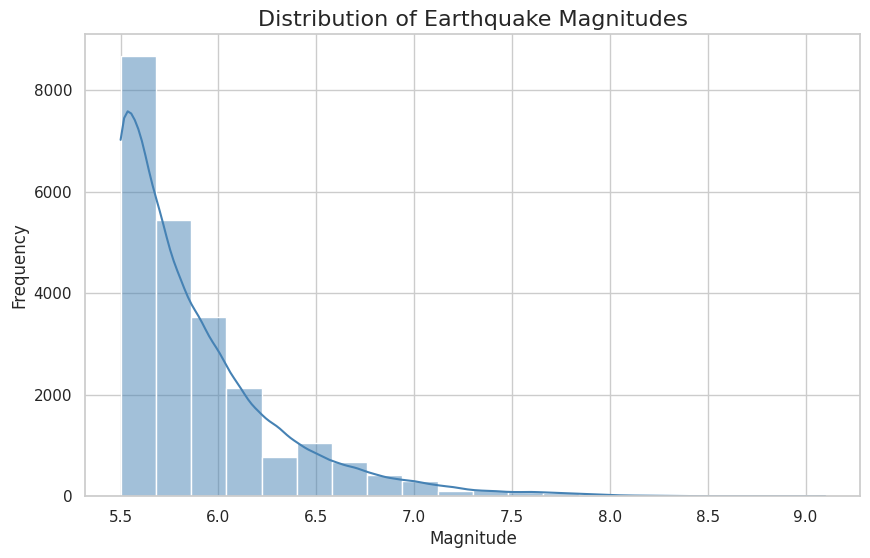

In [17]:
# Cell 20: Magnitude Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot magnitude distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Magnitude'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Earthquake Magnitudes', fontsize=16)
plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


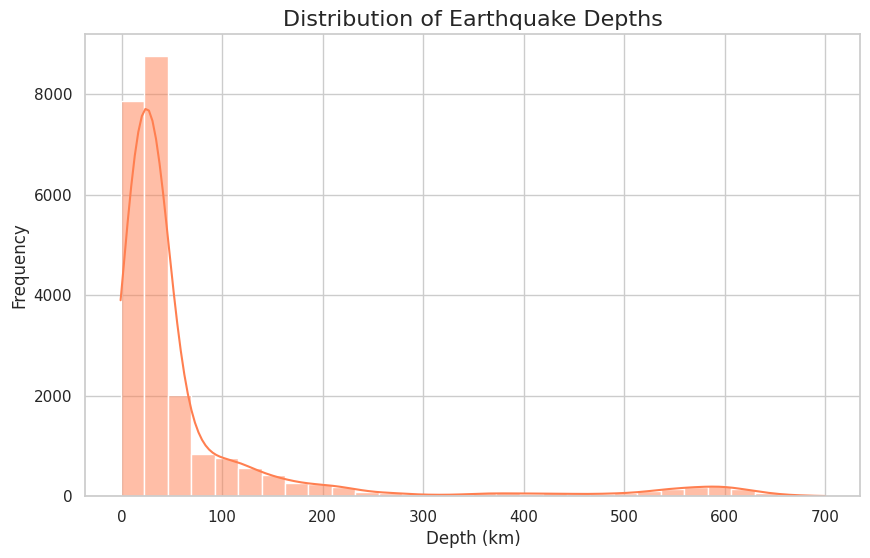

In [18]:
# Cell 21: Depth Distribution
# Plot depth distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Depth'], bins=30, kde=True, color='coral')
plt.title('Distribution of Earthquake Depths', fontsize=16)
plt.xlabel('Depth (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


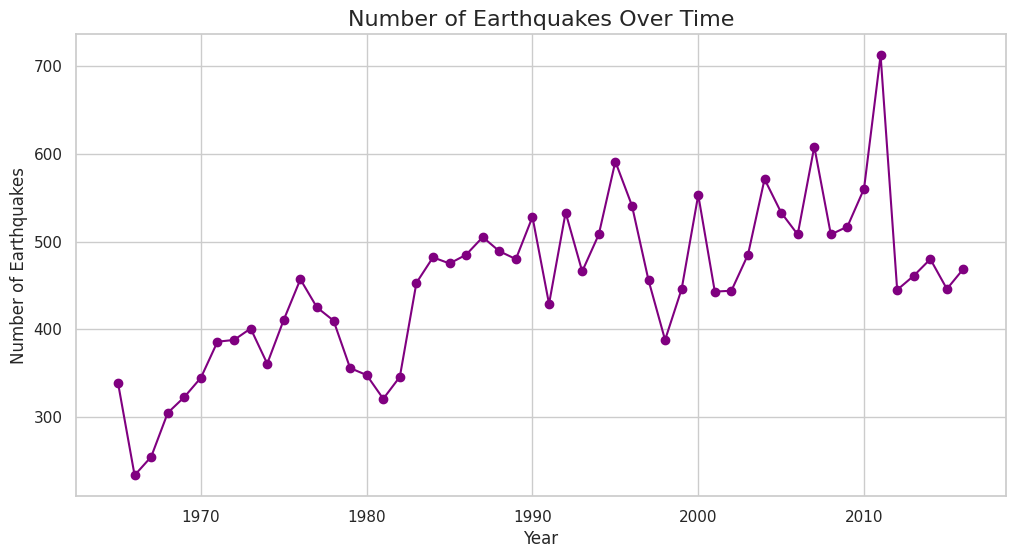

In [19]:
# Cell 22: Earthquakes Over Time
# Resample data to count earthquakes per year
df_cleaned['Year'] = df_cleaned['Datetime'].dt.year
earthquakes_per_year = df_cleaned.groupby('Year').size()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o', color='purple')
plt.title('Number of Earthquakes Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.grid(True)
plt.show()


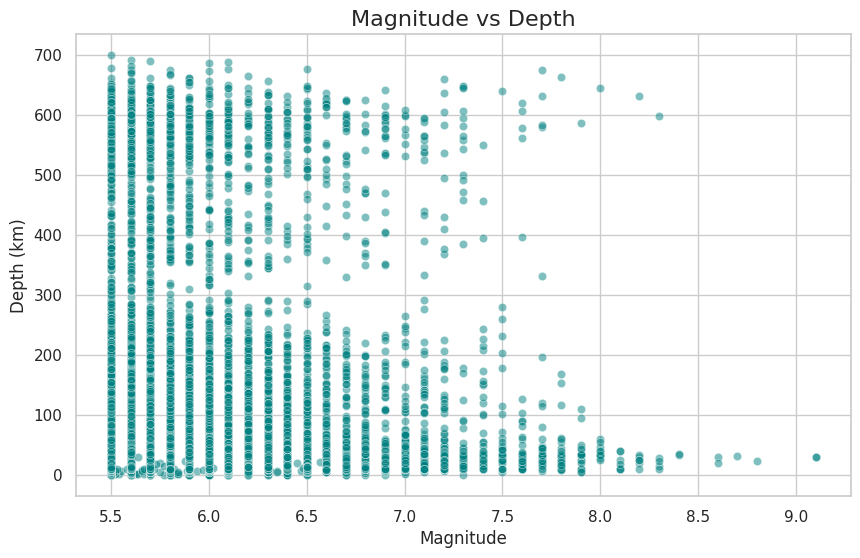

In [20]:
# Cell 23: Magnitude vs Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Magnitude', y='Depth', data=df_cleaned, alpha=0.5, color='teal')
plt.title('Magnitude vs Depth', fontsize=16)
plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Depth (km)', fontsize=12)
plt.grid(True)
plt.show()


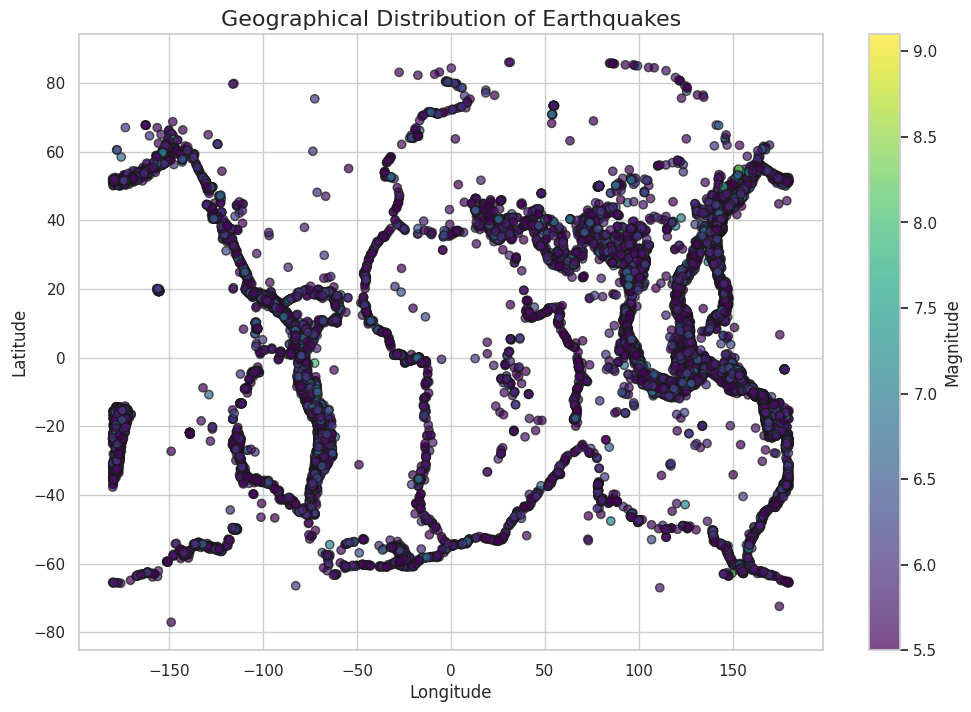

In [21]:
# Cell 24: Geographical Distribution (Latitude and Longitude)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'],
            c=df_cleaned['Magnitude'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Magnitude')
plt.title('Geographical Distribution of Earthquakes', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-22-bd3de04f00ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Magnitude', data=df_cleaned, palette='coolwarm')


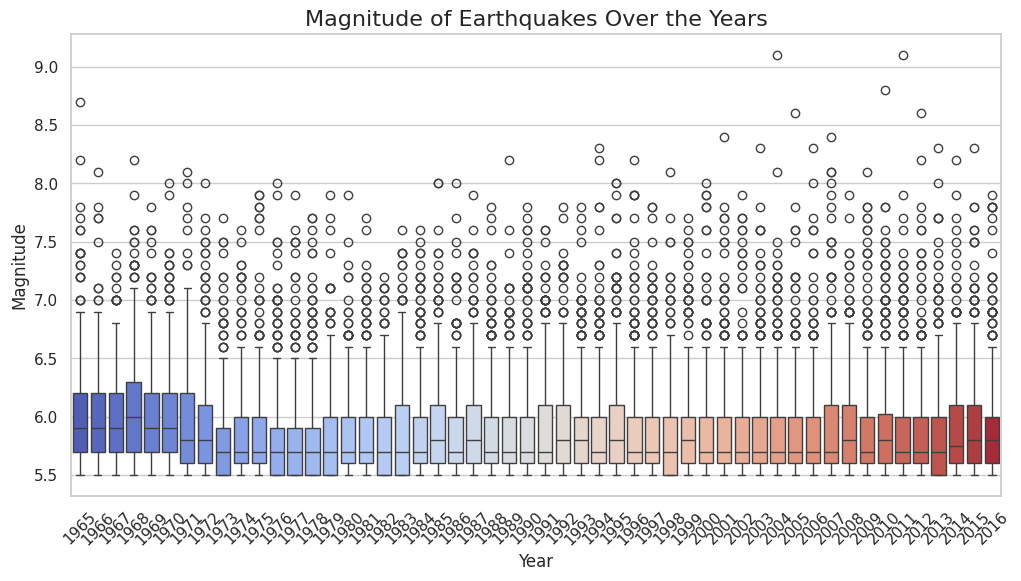

In [22]:
# Cell 25: Magnitude over Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Magnitude', data=df_cleaned, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Magnitude of Earthquakes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True, axis='y')
plt.show()


<ipython-input-23-7ab825a2c81a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Depth', data=df_cleaned, palette='Spectral')


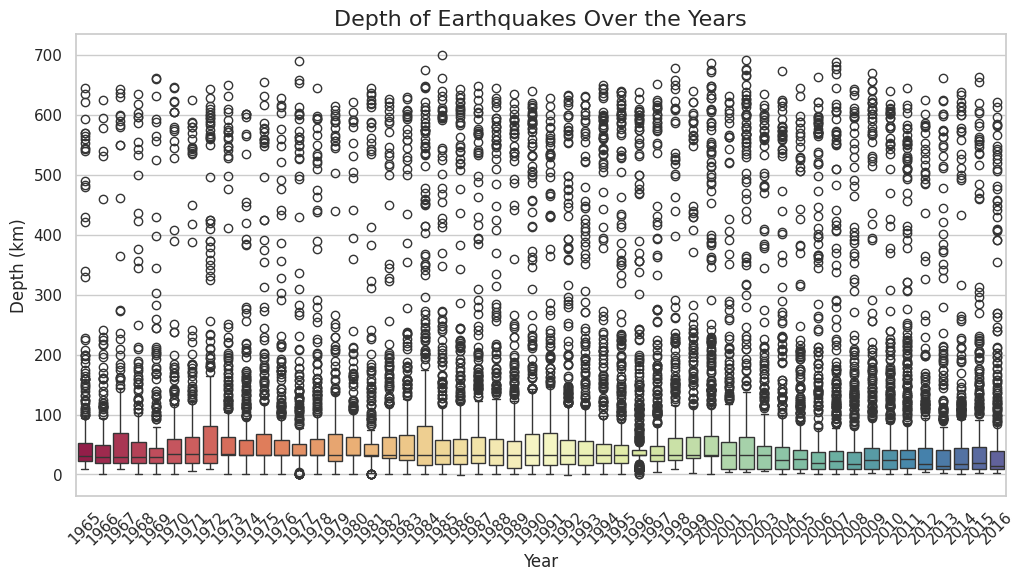

In [23]:
# Cell 26: Depth over Time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Depth', data=df_cleaned, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Depth of Earthquakes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Depth (km)', fontsize=12)
plt.grid(True, axis='y')
plt.show()


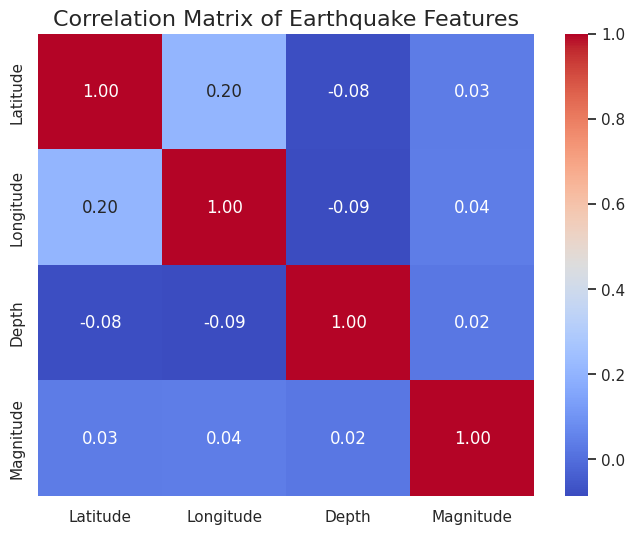

In [24]:
# Cell 27: Correlation Heatmap
correlation_matrix = df_cleaned[['Latitude', 'Longitude', 'Depth', 'Magnitude']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Earthquake Features', fontsize=16)
plt.show()


### Final Summary and Wrap-Up:

1. **Magnitude Distribution**:
   - The majority of earthquakes are between magnitudes 5.5 and 6.5, with fewer higher-magnitude events.

2. **Depth Distribution**:
   - Most earthquakes occur at depths shallower than 100 km, and deeper earthquakes are rare.

3. **Temporal Trends**:
   - The number of recorded earthquakes increases over the years, reflecting better detection capabilities.
   - Earthquake magnitudes and depths show consistent behavior over time without extreme variation.

4. **Geographical Distribution**:
   - Earthquake occurrences are concentrated along tectonic plate boundaries, with the **Pacific Ring of Fire** being a significant hotspot.
   - Higher magnitudes are evenly spread but still tied to these boundaries.

5. **Relationships Between Features**:
   - The scatter plot of magnitude vs. depth shows no clear correlation, emphasizing that magnitude does not depend significantly on depth.
   - Correlation matrix reaffirms that geographical features (latitude, longitude) have weak linear relationships with magnitude or depth.